In [51]:
import math

## Exercise 2

In [6]:
def clf(x):
    preds = []
    for val in x:
        preds.append(predict_point(val))
    return preds

def predict_point(x):
    x1, x2 = x
    if x2 < 1:
        if x1 < 1:
            return 0, -1.8
        else:
            return 1, .63
    else:
        if x2 < 2:
            if x1 < 0:
                return 2, -1.06
            else:
                return 3, .21
        else:
            return 4, 2.49

In [7]:
clf([[0,2]])

[(4, 2.49)]

In [ ]:
## Decision regions drawing

## Exercise 3
A decision tree is a decision structure - discriminative classifier (posterior probabilities directly), determining a decision rule that can be represented as hyper-rectangles. Recursive binary splitting of the feature space!
## Exercise 4
Entropy gives more balanced trees

Classification error will not be able to distinguish between goodness of split - do NOT use as splitting criteria

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
count = lambda s: np.unique(s, return_counts=True)[1]
pk = lambda s: count(s) / len(s)

gini = lambda s: 1 - np.sum(np.power(pk(s),2))
entropy = lambda s: - np.sum(pk(s) * np.log2(pk(s))) ## Somethings wrong here
classification_error = lambda s: (1-np.max(pk(s))) / np.sum(pk(s))

weighted_gini = lambda *split: np.sum([gini(s)*len(s) for s in split]) / np.sum([len(s) for s in split])
weighted_entropy = lambda *split: np.sum([entropy(s)*len(s) for s in split]) / np.sum([len(s) for s in split])

In [28]:
s = [0,0,0,0]
s2 = [0,0,1,1]
print('Probability of class k for s and s2:\n',pk(s), pk(s2))
print('\nGini Impurity for s and s2:\n',gini(s), gini(s2))
print('\nEntropy for s and s2:\n',entropy(s), entropy(s2))

Probability of class k for s and s2:
 [1.] [0.5 0.5]

Gini Impurity for s and s2:
 0.0 0.5

Entropy for s and s2:
 -0.0 1.0


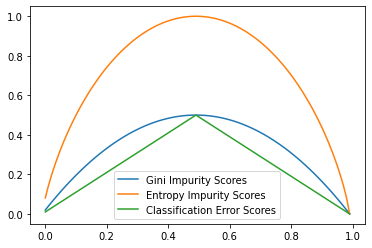

In [33]:
n = 100
s = [0] * n
ginis = []
entropys = []
errors = []
for i in range(n):
    s[i] = 1
    ginis.append(gini(s))
    entropys.append(entropy(s))
    errors.append(classification_error(s))
plt.plot(np.array(range(n)) / n, ginis, label='Gini Impurity Scores')
plt.plot(np.array(range(n)) / n, entropys, label='Entropy Impurity Scores')
plt.plot(np.array(range(n)) / n, errors, label='Classification Error Scores')
plt.legend();

#### The actual exercise

In [30]:
# Split 1 (x1 < 1.5)
s1 = [0] * 2
s2 = [1] * 12 + [0] * 2
print('Gini Impurities: \n',gini(s1), gini(s2))
print('\nWeighted Avg. of Ginis',weighted_gini(s1,s2))
print()

# Split 2 (x1 < 3.5)
s1 = [0] * 4 + [1] * 2
s2 = [1] * 10
print('\n\nGini Impurities:\n',gini(s1), gini(s2))
print('\nWeighted Avg. of Ginis',weighted_gini(s1,s2))

Gini Impurities: 
 0.0 0.24489795918367352

Weighted Avg. of Ginis 0.21428571428571433



Gini Impurities:
 0.4444444444444444 0.0

Weighted Avg. of Ginis 0.16666666666666666


## Exercise 5

In [34]:
# Toy Dataset
x = np.array([[1,1],[1,3],[2,2],[2,3],[3,2],[3,3]])
y = np.array([0,1,1,0,1,1])

In [35]:
# impurity of whole dataset
imp = gini(y)
imp

0.4444444444444444

In [56]:
def get_possible_splits(x):
    # We split in between each unique value for each dimension
    res = []
    for j in range(x.shape[1]):
        sv = sorted(set(x[:,j]))
        cs = [(sv[i] + sv[i+1]) / 2 for i in range(len(sv)-1)]
        res.append((j,cs))
    return res

In [57]:
get_possible_splits(x) ## Something is wrong here

[(0, [1.5, 2.5]), (1, [1.5, 2.5])]

In [58]:
def get_best_split(x, y):
    best_split_params = (None, None)
    best_split = (None, None)
    min_impurity = math.inf

    possible_splits = get_possible_splits(x)

    for j, cs in possible_splits:
        for c in cs:
            mask = x[:,j] < c 
            x1, y1 = x[mask], y[mask]
            x2, y2 = x[~mask], y[~mask]

            weighted_impurity = weighted_gini(y1, y2)

            if weighted_impurity < min_impurity:
                min_impurity = weighted_impurity
                best_split_params = (j, c)
                best_split = ((x1,x2),(y1,y2))

    return (best_split_params, best_split, min_impurity)

In [59]:
get_best_split(x,y)

((1, 1.5),
 ((array([[1, 1]]), array([[1, 3],
          [2, 2],
          [2, 3],
          [3, 2],
          [3, 3]])),
  (array([0]), array([1, 1, 0, 1, 1]))),
 0.26666666666666655)

In [61]:
def split(x, y):
    best_split_params, best_split, min_impurity = get_best_split(x,y)
    j, c = best_split_params
    s1, s2 = best_split
    x1, y1 = s1
    x2, y2 = s2
    print(f'Split feature {j} at {c} with impurity of {min_impurity}')

    ## Recursively Splitting until leaf is PURE
    if len(count(y1)) > 1:
        return split(x1, y1)
    if len(count(y2)) > 1:
        return split(x2, y2)

In [62]:
split(x,y) ## Something went wrong

Split feature 1 at 1.5 with impurity of 0.26666666666666655


TypeError: cannot unpack non-iterable NoneType object

## Exercise 6

In [74]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
## from mlxtend.plotting import plot_decision_regions

In [71]:
test = pd.read_csv('Ex1-training.csv')
train = pd.read_csv('Ex1-test.csv')

x_train, y_train = train[['x1','x2']], train['y']
x_test, y_test = test[['x1','x2']], test['y']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
print(f'Accuracy score at max_depth 3: {accuracy_score(y_test,preds)}')

Accuracy score at max_depth 3: 0.8655555555555555


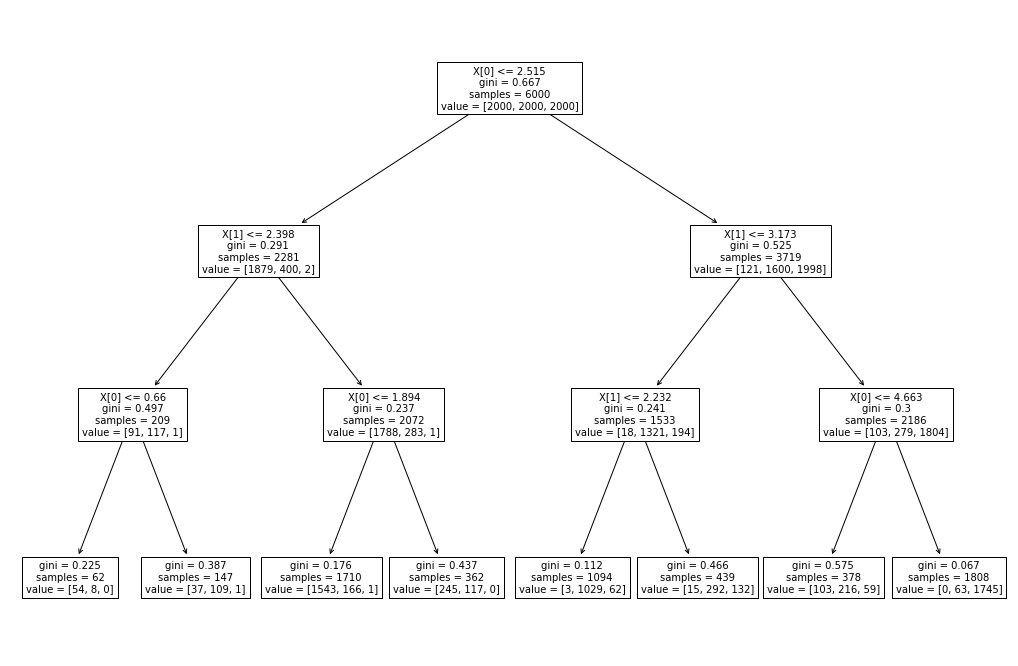

In [85]:
plt.figure(figsize=(18,12))
plot_tree(clf, fontsize=10);